## Feature Classification

In this notebook we...

### Novelty
...


#### REFRENCES:
1. Mahana, M., Johns, M., & Apte, A. (2012). Automated essay grading using machine learning. Mach. Learn. Session, Stanford University.

2. Suresh, A., & Jha, M. (2018). Automated essay grading using natural language processing and support vector machine. International Journal of Computing and Technology, 5(2), 18-21.

3. Rokade, A., Patil, B., Rajani, S., Revandkar, S., & Shedge, R. (2018, April). Automated Grading System Using Natural Language Processing. In 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT) (pp. 1123-1127). IEEE.

4. Song, S., & Zhao, J. (2013). Automated essay scoring using machine learning. Stanford University.

5. Kakkonen, T., Myller, N., & Sutinen, E. (2006). Applying Part-of-Seech Enhanced LSA to Automatic Essay Grading. arXiv preprint cs/0610118.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn.metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('features/features_set_3.csv')
data

,essay_id,essay,domain1_score,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,neg_score,pos_score,neu_score,cosine_similarity
0,1,"Dear local newspaper, I think effects computer...",8.0,350,16,4.237143,162,0.045714,0.237143,0.051429,0.211429,0.068571,0.000,0.170,0.830,0.123651
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,423,20,4.312057,185,0.061466,0.252955,0.044917,0.200946,0.044917,0.014,0.219,0.766,0.121286
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,283,14,4.342756,145,0.031802,0.289753,0.070671,0.183746,0.056537,0.045,0.197,0.759,0.151787
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,530,27,4.813208,236,0.122642,0.335849,0.079245,0.183019,0.054717,0.008,0.152,0.840,0.126890
4,5,"Dear @LOCATION1, I know having computers has a...",8.0,473,30,4.334038,190,0.035941,0.241015,0.067653,0.190275,0.076110,0.026,0.096,0.879,0.130996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1783,"Dear @CAPS1, @CAPS2 several reasons on way I t...",8.0,509,21,4.015717,206,0.062868,0.223969,0.068762,0.212181,0.076621,0.019,0.097,0.883,0.076209
1779,1784,Do a adults and kids spend to much time on the...,7.0,214,18,4.004673,109,0.032710,0.247664,0.060748,0.214953,0.046729,0.007,0.173,0.820,0.100699
1780,1785,My opinion is that people should have computer...,8.0,296,18,4.489865,100,0.027027,0.277027,0.050676,0.189189,0.027027,0.022,0.118,0.861,0.143533
1781,1786,"Dear readers, I think that its good and bad to...",2.0,15,1,3.733333,14,0.000000,0.133333,0.200000,0.133333,0.000000,0.175,0.275,0.550,0.051164


In [3]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [4]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.2 , random_state=0)

## Random Forest Classifier

### What is Random Forest?
Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest”.  A decision tree is another type of algorithm used to classify data. In very simple terms, it is like a flowchart that draws a clear pathway to a decision or outcome; it starts at a single point and then branches off into two or more directions, with each branch of the decision tree offering different possible outcomes.

### How does it work?
Random Forest grows multiple decision trees which are merged together for a more accurate prediction.

The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone. When using Random Forest for classification, each tree gives a classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using Random Forest for regression, the forest picks the average of the outputs of all trees.

### Advantages
1. Very easy to use.
2. Random Forest is much more efficient than a single Decision Tree while performing analysis on a large database.
3. Random forests have a very good accuracy.
4. They are versatile (can be used for regression or classification).

In [5]:
rf = RandomForestClassifier(class_weight='balanced_subsample')
rf_params = {'n_estimators':list(range(20,200,10)),
                'max_depth':list(range(2,14,1))}

In [6]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')
rf_random=GridSearchCV(estimator = rf, param_grid  = rf_params, cv = 5, verbose=2,  n_jobs = 2, scoring=scorer)

In [7]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140, 150, 160, 170,
                                          180, 190]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [8]:
rf_final = RandomForestClassifier(random_state=0, n_estimators=rf_random.best_params_['n_estimators'], max_depth=rf_random.best_params_['max_depth'],class_weight='balanced_subsample')
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       n_estimators=180, random_state=0)

In [9]:
X_pred = rf_final.predict(X_test)

In [10]:
report = classification_report(X_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

         2.0      0.750     1.000     0.857         3
         4.0      0.500     0.333     0.400         3
         5.0      0.000     0.000     0.000         1
         6.0      0.700     0.500     0.583        28
         7.0      0.458     0.239     0.314        46
         8.0      0.458     0.767     0.574        86
         9.0      0.509     0.326     0.397        86
        10.0      0.385     0.566     0.458        53
        11.0      0.350     0.194     0.250        36
        12.0      0.375     0.200     0.261        15

    accuracy                          0.457       357
   macro avg      0.449     0.413     0.409       357
weighted avg      0.466     0.457     0.435       357



<AxesSubplot:>

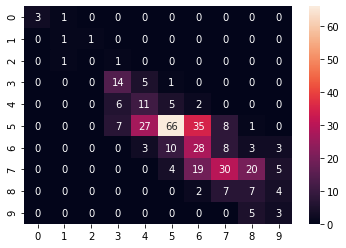

In [11]:
cm = confusion_matrix(y_test, X_pred)
sns.heatmap(cm, annot=True)

In [12]:
print(accuracy_score(y_test, X_pred))

0.4565826330532213


## XGBoost Classifier

### What is XGBoost?

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification. XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

XGBoost belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library.

### Boosting
Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. A weak learner is one which is slightly better than random guessing. 


### Advantages of XGBoost:

1. It is comparatively faster than other ensemble classifiers
2. The code XGBoost algorithm is parallelizable and hence can harness the power of multi-core GPUs.
3. It has a wide range of tuning parameters (cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API).


In [13]:
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                            objective = "multi:softmax")

In [14]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}
# subsample: Denotes the subsample ratio of columns for each split, in each level.
# colsample_bytree: Denotes the fraction of columns to be randomly samples for each tree.
# gamma: Gamma specifies the minimum loss reduction required to make a split.
# reg_alpha: Lasso L1 regularization
# reg_lambda: Ridge L2 reguralarization

In [15]:
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )


In [16]:
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[16:36:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.3s
[16:36:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bytree=1.0, gamma=1.5, learning_rate=0.1, max_depth=2, min_child_weight=5, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.3s
[16:36:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the 

[CV 10/10] END colsample_bytree=0.8, gamma=2, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=100, reg_alpha=1, reg_lambda=4.5, subsample=0.4; total time=   0.4s
[16:36:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=1, n_estimators=250, reg_alpha=0.5, reg_lambda=4.5, subsample=0.2; total time=   0.8s
[16:36:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=2, min_child_weight=1, n_estimators=250, reg_alpha=0

[CV 9/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[16:36:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.5s
[16:36:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10] END colsample_bytree=1.0, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=7, n_estimators=500, reg_alpha=1, reg

[CV 8/10] END colsample_bytree=0.6, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=1, reg_lambda=3, subsample=0.7; total time=   0.6s
[16:36:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END colsample_bytree=0.6, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, reg_alpha=1, reg_lambda=3, subsample=0.7; total time=   0.6s
[16:36:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 10/10] END colsample_bytree=0.6, gamma=0.01, learning_rate=0.001, max_depth=10, min_child_weight=3, n_estimators=100, reg_alph

[CV 7/10] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=1.5, subsample=0.4; total time=   9.3s
[16:37:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=1.5, subsample=0.4; total time=   7.8s
[16:37:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/10] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=1000, reg_alpha=0

[CV 6/10] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=7, min_child_weight=7, n_estimators=250, reg_alpha=0.5, reg_lambda=2, subsample=0.4; total time=   0.9s
[16:38:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/10] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=7, min_child_weight=7, n_estimators=250, reg_alpha=0.5, reg_lambda=2, subsample=0.4; total time=   0.9s
[16:38:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/10] END colsample_bytree=0.6, gamma=2, learning_rate=0.001, max_depth=7, min_child_weight=7, n_estimators=250, reg_alpha=0.5, re

In [17]:
xgb_final = XGBClassifier(random_state=0, 
                          n_estimators=xgb_rscv.best_params_['n_estimators'], 
                          max_depth=xgb_rscv.best_params_['max_depth'],
                          learning_rate=xgb_rscv.best_params_['learning_rate'],
                          gamma=xgb_rscv.best_params_['gamma'],
                          colsample_bytree=xgb_rscv.best_params_['colsample_bytree'],
                          subsample=xgb_rscv.best_params_['subsample'],
                          reg_alpha=xgb_rscv.best_params_['reg_alpha'],
                          reg_lambda=xgb_rscv.best_params_['reg_lambda'],
                          min_child_weight=xgb_rscv.best_params_['min_child_weight'])
xgb_final.fit(X_train, y_train)

[16:38:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=3, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred = xgb_final.predict(X_test)

In [19]:
report = classification_report(y_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

         2.0      0.000     0.000     0.000         0
         4.0      1.000     0.286     0.444         7
         5.0      0.000     0.000     0.000         0
         6.0      0.750     0.484     0.588        31
         7.0      0.083     0.286     0.129         7
         8.0      0.771     0.703     0.735       158
         9.0      0.382     0.382     0.382        55
        10.0      0.538     0.532     0.535        79
        11.0      0.200     0.200     0.200        20
        12.0      0.000     0.000     0.000         0

    accuracy                          0.552       357
   macro avg      0.372     0.287     0.301       357
weighted avg      0.617     0.552     0.576       357



<AxesSubplot:>

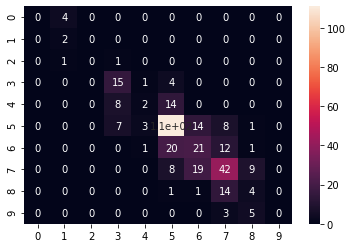

In [20]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True)

In [21]:
accuracy_score(y_test, y_pred)

0.5518207282913166

## Support Vector Classifier

### What is a Support Vector MAchine (SVM)?
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

### How do SVMs work?
A support vector machine takes data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary: anything that falls to one side of it we will classify as blue, and anything that falls to the other as red.

<img src="hyperplane.png" />

### Advantages
1. SVMs can give results at a higher speed and better accuracy with lesser number of samples.
2. The SVM provides a very useful technique within it known as kernel and by the application of associated kernel function we can solve any complex problem.
3. SVM generally do not suffer condition of overfitting and performs well when there is a clear indication of separation between classes.

In [22]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [23]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, y_train)

SVC(random_state=0)

In [24]:
Y_Pred = classifier.predict(X_Test)

<AxesSubplot:>

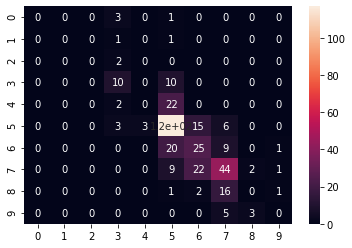

In [25]:
cm2 = confusion_matrix(y_test, Y_Pred)
sns.heatmap(cm2, annot=True)

In [26]:
accuracy_score(y_test, Y_Pred)

0.5490196078431373

## Extreme Learning Machine (ELM)

### What is ELM?
Extreme learning machines are feed-forward neural networks for classification, regression, clustering, sparse approximation, compression and feature learning with a single layer or multiple layers of hidden nodes, where the parameters of hidden nodes (not just the weights connecting inputs to hidden nodes) need not be tuned. These hidden nodes can be randomly assigned and never updated (i.e. they are random projection but with nonlinear transforms), or can be inherited from their ancestors without being changed. In most cases, the output weights of hidden nodes are usually learned in a single step, which essentially amounts to learning a linear model. 


## Linear Regression

### What is Linear Regression?
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

### How does it work?
A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). 
### Advantages
1. Linear Regression is a very simple algorithm that can be implemented very easily to give satisfactory results.
2. Linear regression fits linearly seperable datasets almost perfectly and is often used to find the nature of the relationship between variables.
3. Overfitting can be reduced by regularization. <strong>Overfitting</strong> is a situation that arises when a machine learning model fits a dataset very closely and hence captures the noisy data as well.This negatively impacts the performance of model and reduces its accuracy on the test set. <strong>Regularization</strong> is a technique that can be easily implemented and is capable of effectively reducing the complexity of a function so as to reduce the risk of overfitting.

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
    r_sq = model.score(X_train, y_train)
    print('Coefficient of determination is: ', r_sq)
    print('Model intercept: ', model.intercept_)
    print("Slope: ", model.coef_)

Coefficient of determination is:  0.7229117431679706
Model intercept:  65.02658297280007
Slope:  [ 2.56401747e-03  4.26552571e-03  6.01508031e-01  1.84289328e-02
  1.36171431e-01 -1.10263654e+00 -1.91027354e+00 -1.99825456e+00
 -1.52506725e+00 -6.34244194e+01 -6.30677136e+01 -6.27916193e+01
  4.93669562e+00]


In [30]:
y_pred = list(map(int, model.predict(X_test)))
print("Predicted values: ", y_pred)

Predicted values:  [7, 6, 8, 7, 8, 9, 10, 9, 7, 10, 9, 7, 8, 8, 8, 9, 9, 7, 7, 8, 7, 9, 5, 9, 9, 9, 7, 7, 10, 8, 8, 9, 8, 7, 11, 9, 8, 11, 8, 6, 9, 7, 8, 7, 10, 7, 9, 7, 6, 8, 8, 7, 9, 7, 7, 10, 8, 8, 8, 7, 10, 7, 9, 8, 9, 8, 8, 8, 7, 9, 9, 7, 9, 10, 8, 9, 8, 8, 7, 9, 6, 8, 10, 7, 10, 8, 5, 8, 8, 10, 10, 9, 11, 10, 8, 4, 10, 7, 8, 9, 6, 7, 6, 9, 8, 9, 9, 6, 8, 8, 8, 8, 8, 10, 10, 5, 9, 8, 6, 8, 8, 8, 9, 9, 11, 10, 8, 8, 7, 6, 10, 9, 7, 9, 9, 7, 7, 7, 8, 7, 9, 8, 8, 8, 9, 8, 7, 9, 7, 8, 10, 9, 7, 9, 9, 8, 9, 6, 8, 9, 9, 8, 8, 8, 8, 7, 9, 8, 8, 8, 7, 10, 10, 11, 7, 4, 10, 8, 6, 8, 9, 9, 10, 8, 7, 8, 10, 9, 9, 9, 8, 6, 7, 6, 6, 8, 7, 9, 8, 6, 10, 9, 10, 9, 7, 7, 7, 9, 10, 8, 7, 6, 8, 9, 9, 7, 6, 6, 7, 7, 9, 7, 11, 9, 9, 9, 10, 10, 8, 7, 10, 9, 7, 10, 8, 8, 10, 8, 8, 7, 9, 8, 9, 9, 10, 8, 9, 10, 9, 9, 7, 7, 8, 8, 8, 5, 9, 8, 10, 9, 7, 8, 9, 8, 7, 7, 9, 8, 9, 8, 10, 11, 8, 6, 8, 7, 6, 7, 8, 10, 8, 7, 7, 8, 9, 9, 11, 6, 10, 7, 7, 4, 8, 7, 10, 11, 9, 8, 10, 5, 7, 10, 11, 9, 10, 8, 9, 6, 8, 9,

In [31]:
print("Mean squared error: %.4f" % np.mean((model.predict(X_test) - y_test) ** 2))
print('Variance score: %.4f' % model.score(X_test, y_test))

Mean squared error: 0.7008
Variance score: 0.7090


In [32]:
accuracy_score(y_test, y_pred)

0.4061624649859944